In [1]:
!pip install seaborn scikit-learn matplotlib --quiet



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import seaborn as sns
import pandas as pd
import numpy as np

In [5]:
df = sns.load_dataset('titanic')
features = ['sex', 'age', 'fare', 'class', 'embarked']
X = df[features].copy()
X['age'] = X['age'].fillna(X['age'].median())
X['embarked'] = X['embarked'].fillna('S')

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [9]:
numeric = ['age', 'fare']
categorical = ['sex', 'class', 'embarked']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
])



In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [11]:
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Random Forest', RandomForestClassifier()),
    ('KNN', KNeighborsClassifier())
]

cv = StratifiedKFold(n_splits=5)

In [19]:
for name, model in models:
    pipe = Pipeline([
        ('pre', preprocessor),
        ('clf', model)
    ])
    scores = cross_val_score(pipe, X, y, cv=cv, scoring='accuracy')
    print(f'{name} | Mean Accuracy: {scores.mean():.4f} | Std: {scores.std():.4f}')

Logistic Regression | Mean Accuracy: 0.7890 | Std: 0.0148
Random Forest | Mean Accuracy: 0.8047 | Std: 0.0199
KNN | Mean Accuracy: 0.8059 | Std: 0.0072


In [13]:
# Evaluating best model from my previous outputs (Random Forest) in detail
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

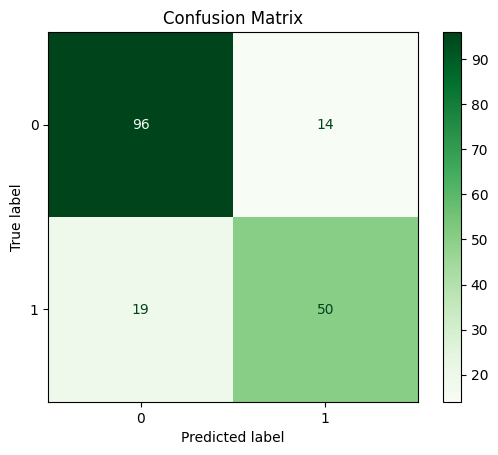

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       110
           1       0.78      0.72      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



In [17]:
pipe = Pipeline([
    ('pre', preprocessor),
    ('clf', RandomForestClassifier())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

# C-M
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Greens')
plt.title('Confusion Matrix')
plt.show()

#Classification Report
print(classification_report(y_test, y_pred))

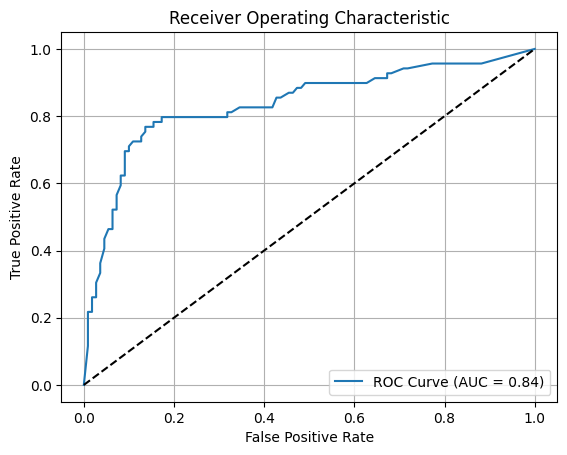

In [18]:
#ROC Curve
y_prob = pipe.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()